In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

In [3]:
chunks = pd.read_csv('/content/Drive/MyDrive/2020_Yellow_Taxi_Trip_Data.csv', chunksize=500_000)

filtered_chunks = []
for chunk in chunks:
    chunk_filtered = chunk[chunk['fare_amount'] > 0]  # or any condition
    filtered_chunks.append(chunk_filtered)

df = pd.concat(filtered_chunks, ignore_index=True)

<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-3-088b24a889ba>:4: DtypeWarning: Columns (6

In [4]:
df = df[['passenger_count','trip_distance','payment_type','fare_amount','tpep_pickup_datetime','tpep_dropoff_datetime']]

In [ ]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,tpep_pickup_datetime,tpep_dropoff_datetime
0,1.0,1.2,1.0,6.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM
1,1.0,1.2,1.0,7.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM
2,1.0,0.6,1.0,6.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM
3,1.0,0.8,1.0,5.5,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM
4,1.0,0.0,2.0,3.5,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM


In [ ]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
24544667,NaN,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,NaN,9.22,NaN,NaN,143,20,NaN,32.49,0.0,0.5,8.16,0.00,0.3,43.95,2.5
24544668,NaN,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,NaN,4.79,NaN,NaN,4,262,NaN,13.22,0.0,0.5,3.65,0.00,0.3,20.17,2.5
24544669,NaN,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,NaN,28.00,NaN,NaN,210,78,NaN,69.31,0.0,0.5,2.75,6.12,0.3,78.98,0.0
24544670,NaN,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,NaN,7.08,NaN,NaN,148,129,NaN,35.95,0.0,0.5,2.75,0.00,0.3,39.50,0.0
24544671,NaN,12/31/2020 11:12:48 PM,12/31/2020 11:24:51 PM,NaN,2.35,NaN,NaN,18,235,NaN,17.09,0.0,0.5,2.75,0.00,0.3,20.64,0.0


In [ ]:
df.shape

(24544672, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24544672 entries, 0 to 24544671
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 3.3+ GB


In [ ]:
df = df[['passenger_count','trip_distance','payment_type','fare_amount','tpep_pickup_datetime','tpep_dropoff_datetime']]

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')

In [6]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24544672 entries, 0 to 24544671
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [7]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

# Featur Extraction - To Keep only the columns that required for further analysis

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration'],
      dtype='object')

In [8]:
df = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]

In [ ]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.00,4.800000
1,1.0,1.20,1.0,7.00,7.416667
2,1.0,0.60,1.0,6.00,6.183333
3,1.0,0.80,1.0,5.50,4.850000
4,1.0,0.00,2.0,3.50,2.300000
...,...,...,...,...,...
24544667,NaN,9.22,NaN,32.49,16.783333
24544668,NaN,4.79,NaN,13.22,8.933333
24544669,NaN,28.00,NaN,69.31,39.333333
24544670,NaN,7.08,NaN,35.95,12.883333


In [ ]:
df.isnull().sum()

,0
passenger_count,809010
trip_distance,0
payment_type,809010
fare_amount,0
duration,0


In [ ]:
df.isnull().mean()*100

,0
passenger_count,3.296072
trip_distance,0.000000
payment_type,3.296072
fare_amount,0.000000
duration,0.000000


In [ ]:
(809010/len(df))*100

3.296071750317136

In [9]:
df.dropna(inplace=True)

In [10]:
df['passenger_count']=df['passenger_count'].astype('int64')

In [11]:
df['payment_type']=df['payment_type'].astype('int64')

In [ ]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [ ]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2055,1,0.00,2,7.0,0 days 00:00:00
2439,1,0.00,1,52.0,0 days 00:00:12
2444,2,1.70,1,9.5,0 days 00:13:04
2464,1,0.40,1,4.0,0 days 00:03:05
3341,1,1.20,1,6.0,0 days 00:05:21
...,...,...,...,...,...
24445448,3,0.82,2,6.0,0 days 00:06:26
24445449,1,1.83,1,7.0,0 days 00:06:11
24445451,1,2.18,1,9.0,0 days 00:08:13
24445452,1,2.52,1,9.5,0 days 00:08:08


In [12]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(7583263, 5)

In [13]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.561429
2,0.189209
3,0.071980
5,0.066460
6,0.046422
4,0.038765
0,0.025711
7,0.000011
8,0.000007


In [ ]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,0.657664
2,0.329130
3,0.009302
4,0.003902
5,0.000002


In [14]:
df=df[df['payment_type']<3]

In [15]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [ ]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
24445437,3,7.03,Card,23.5,25.133333
24445443,1,10.63,Card,29.5,18.400000
24445444,1,2.13,Cash,9.5,13.016667
24445447,1,5.50,Cash,19.0,19.583333


In [16]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

<ipython-input-16-b163de1f7efc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)


In [ ]:
df['payment_type'].replace([1, 2], ['Card', 'Cash'],inplace=True)

<ipython-input-15-970fe3da5aaa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1, 2], ['Card', 'Cash'],inplace=True)


In [ ]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,Card,6.0,4.800000
1,1,1.2,Card,7.0,7.416667
2,1,0.6,Card,6.0,6.183333
3,1,0.8,Card,5.5,4.850000
4,1,0.0,Cash,3.5,2.300000


In [ ]:
df.tail()

,passenger_count,trip_distance,payment_type,fare_amount,duration
24445443,1,10.63,Card,29.5,18.400000
24445444,1,2.13,Cash,9.5,13.016667
24445447,1,5.50,Cash,19.0,19.583333
24445450,1,11.30,Cash,33.0,26.050000
24445454,1,6.06,Cash,18.5,12.866667


In [ ]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,7.483116e+06,7.483116e+06,7.483116e+06,7.483116e+06
mean,1.931821e+00,5.215312e+00,1.967459e+01,2.817855e+01
std,1.497059e+00,7.857704e+01,1.574628e+01,2.949228e+02
min,0.000000e+00,-2.218000e+01,1.000000e-02,-5.312312e+05
25%,1.000000e+00,1.800000e+00,1.000000e+01,1.116667e+01
50%,1.000000e+00,3.390000e+00,1.500000e+01,1.750000e+01
75%,2.000000e+00,6.600000e+00,2.400000e+01,2.568333e+01
max,9.000000e+00,1.673295e+05,6.964000e+03,8.525117e+03


In [17]:
df=df[df['trip_distance']>0]
df=df[df['fare_amount']>0]
df=df[df['duration']>0]

In [ ]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333


Detecting and Removing outliers

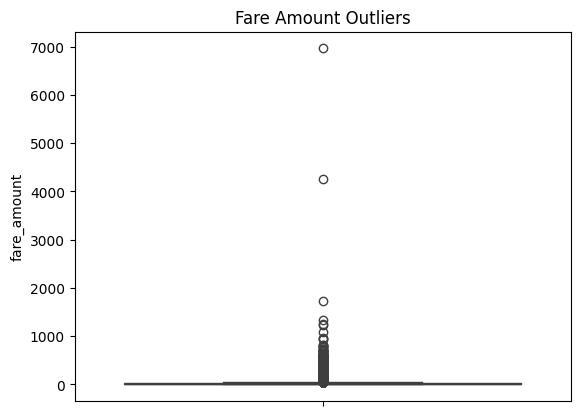

In [ ]:
sns.boxplot(y=df['fare_amount'])
plt.title("Fare Amount Outliers")
plt.show()

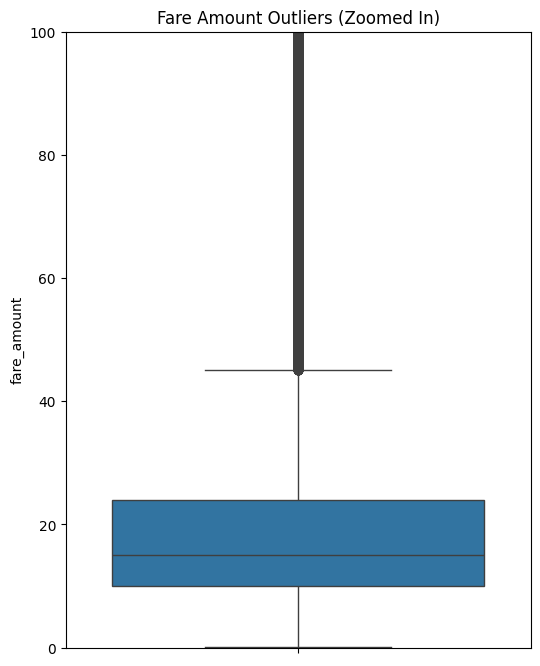

In [ ]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['fare_amount'])
plt.ylim(0, 100)  # Adjust max limit to zoom in
plt.title('Fare Amount Outliers (Zoomed In)')
plt.show()

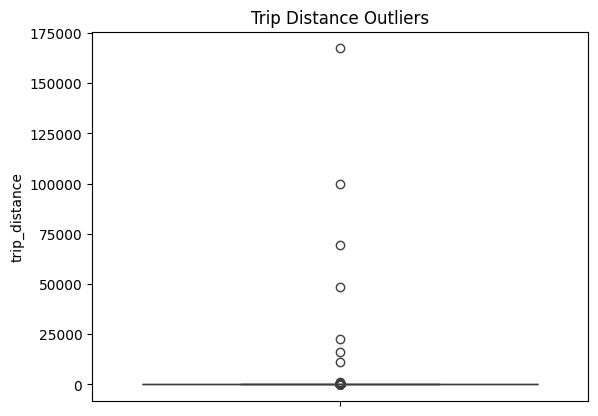

In [ ]:
sns.boxplot(y=df['trip_distance'])
plt.title("Trip Distance Outliers")
plt.show()

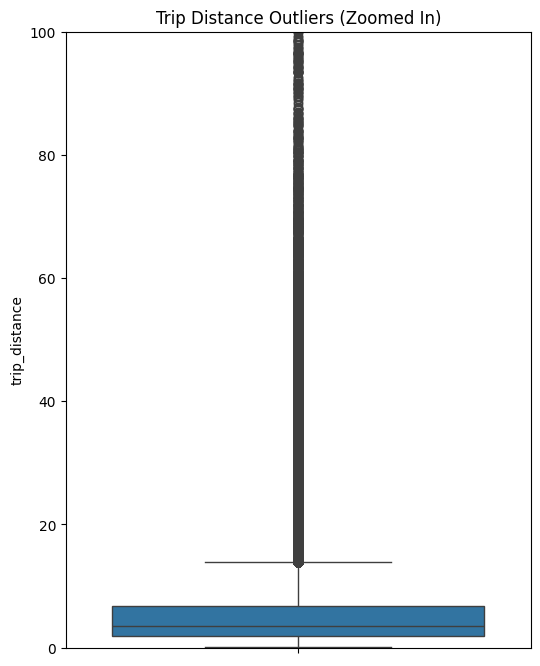

In [ ]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['trip_distance'])
plt.ylim(0, 100)  # Adjust max limit to zoom in
plt.title('Trip Distance Outliers (Zoomed In)')
plt.show()

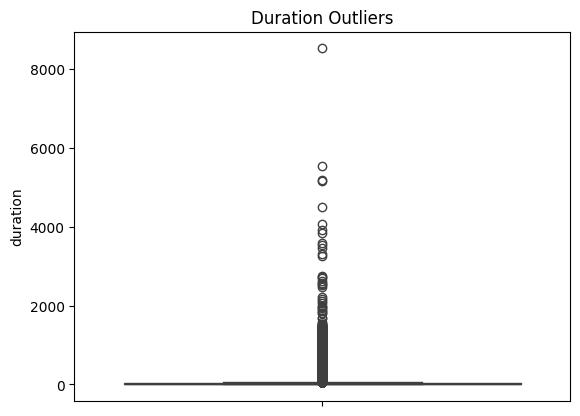

In [ ]:
sns.boxplot(y=df['duration'])
plt.title("Duration Outliers")
plt.show()

In [18]:
for col in ['fare_amount','trip_distance','duration']:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

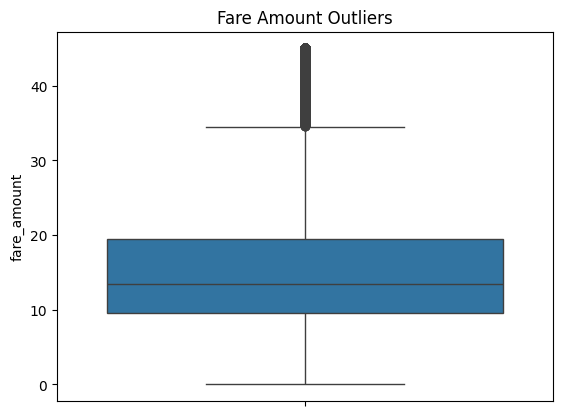

In [ ]:
sns.boxplot(y=df['fare_amount'])
plt.title("Fare Amount Outliers")
plt.show()

In [ ]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,6.340203e+06,6.340203e+06,6.340203e+06,6.340203e+06
mean,2.005912e+00,3.655223e+00,1.490222e+01,1.664314e+01
std,1.540561e+00,2.554157e+00,7.185122e+00,8.266866e+00
min,0.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.700000e+00,9.500000e+00,1.038333e+01
50%,1.000000e+00,2.980000e+00,1.350000e+01,1.581667e+01
75%,2.000000e+00,5.000000e+00,1.950000e+01,2.201667e+01
max,9.000000e+00,1.128000e+01,4.500000e+01,4.078333e+01


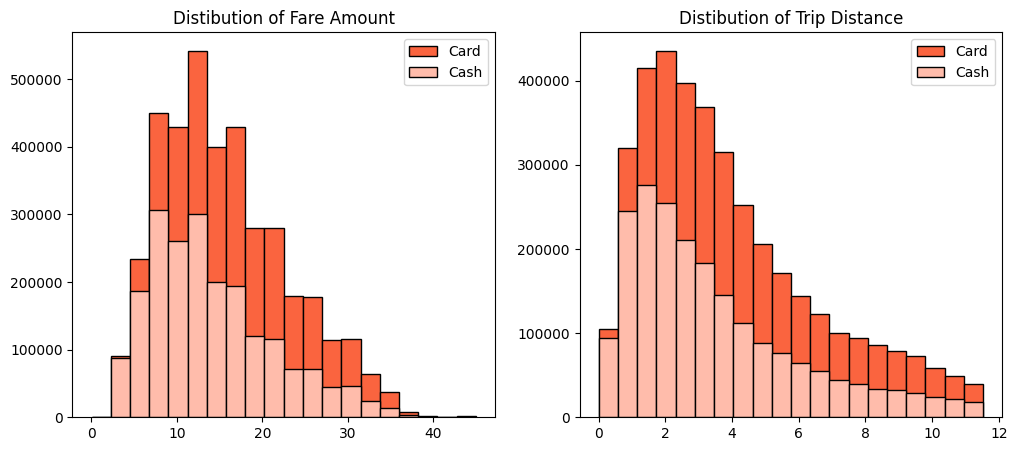

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distibution of Fare Amount")
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distibution of Trip Distance")
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [ ]:
df.groupby('payment_type')[['fare_amount', 'trip_distance']].agg(['mean', 'std'])

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           15.444618  7.217689      3.810551  2.569431
Cash           13.875158  7.008986      3.361101  2.498668

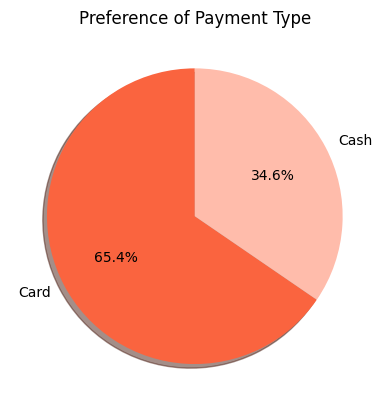

In [ ]:
plt.title("Preference of Payment Type")
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,startangle=90,shadow=True,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [20]:
passenger_count1=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count1.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count1.reset_index(inplace=True)

In [21]:
passenger_count1['perc']=(passenger_count1['count']/passenger_count1['count'].sum())*100

In [22]:
passenger_count1

,payment_type,passenger_count,count,perc
0,Card,1,2180136,37.054752
1,Card,2,813387,13.824759
2,Card,3,335424,5.701045
3,Card,4,179883,3.057387
4,Card,5,325791,5.537317
5,Cash,1,1229010,20.888908
6,Cash,2,425122,7.225600
7,Cash,3,162468,2.761393
8,Cash,4,90192,1.532951
9,Cash,5,142140,2.415887


In [23]:
df1=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df1['payment_type']=['Card','Cash']
df1.iloc[0,1:]=passenger_count1.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count1.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,37.054752,13.824759,5.701045,3.057387,5.537317
1,Cash,20.888908,7.2256,2.761393,1.532951,2.415887


<Axes: ylabel='payment_type'>

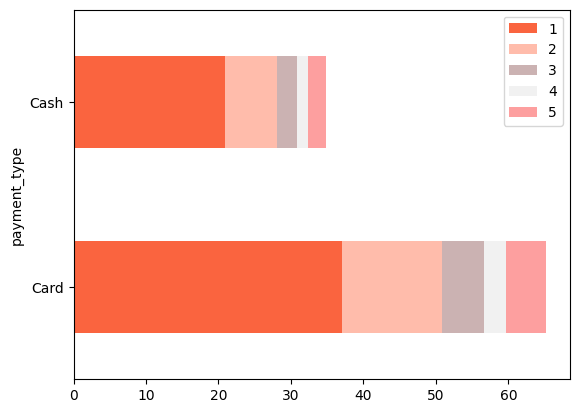

In [24]:
df1.plot(x='payment_type',kind='barh',stacked=True,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

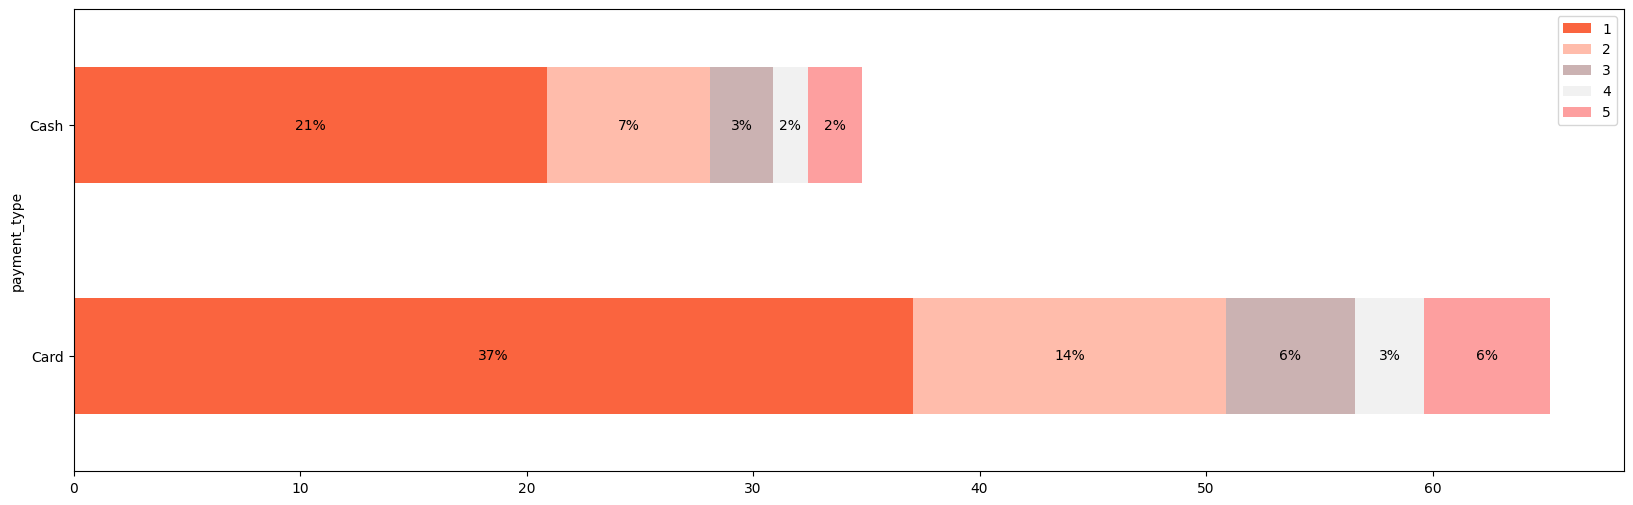

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
df1.plot(x='payment_type',kind='barh',stacked=True,ax=ax,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])
for p in ax.patches:
    width = p.get_width()       # Width of the bar segment (represents %)
    height = p.get_height()     # Height of the bar segment (constant for each bar)
    x, y = p.get_xy()           # Coordinates of the bottom-left of the bar segment

    ax.text(
        x + width / 2,          # x-position: middle of the segment
        y + height / 2,         # y-position: middle vertically
        '{:.0f}%'.format(width),  # Format width as integer % (e.g., 40%)
        horizontalalignment='center',
        verticalalignment='center'
    )

Null Hypothesis : There is no difference in average fare between Customers who uses credit card and customers who use cash

Alternate Hypothesis:There is a difference in average fare between Customers who uses credit card and customers who use cash

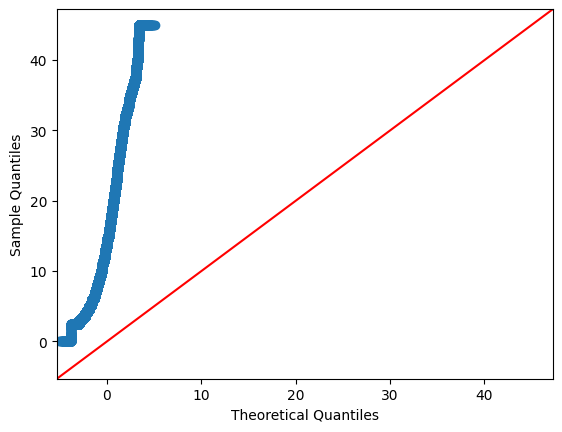

In [26]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

We could see the data is not normalized and the Population standard deviation is not known. Hence we are going with T-Test

In [27]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']

In [28]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T_stattics  :  ',t_stats, 'P Value   :  ',p_value )


T_stattics  :   262.6385877195428 P Value   :   0.0


Here p_value is less than level of significance, so reject the null hypothesis.